# Meta Data



* Inventory performance index: The IPI measures how efficiently and productively you manage your FBA inventory.
* Excess inventory percentage: The percentage of your FBA units identified as excess.
* FBA sell-through: Your FBA rolling 90-day sell-through rate is the number of your units sold and shipped over the past 90 days divided by the average number of units available at fulfillment centers during that time.
* Stranded inventory percentage: The percentage of your FBA units currently stranded.
* FBA in-stock rate: Percentage of time your replenishable FBA products have been in stock for the last 30 days, weighted by the number of units sold in the last 60 days.

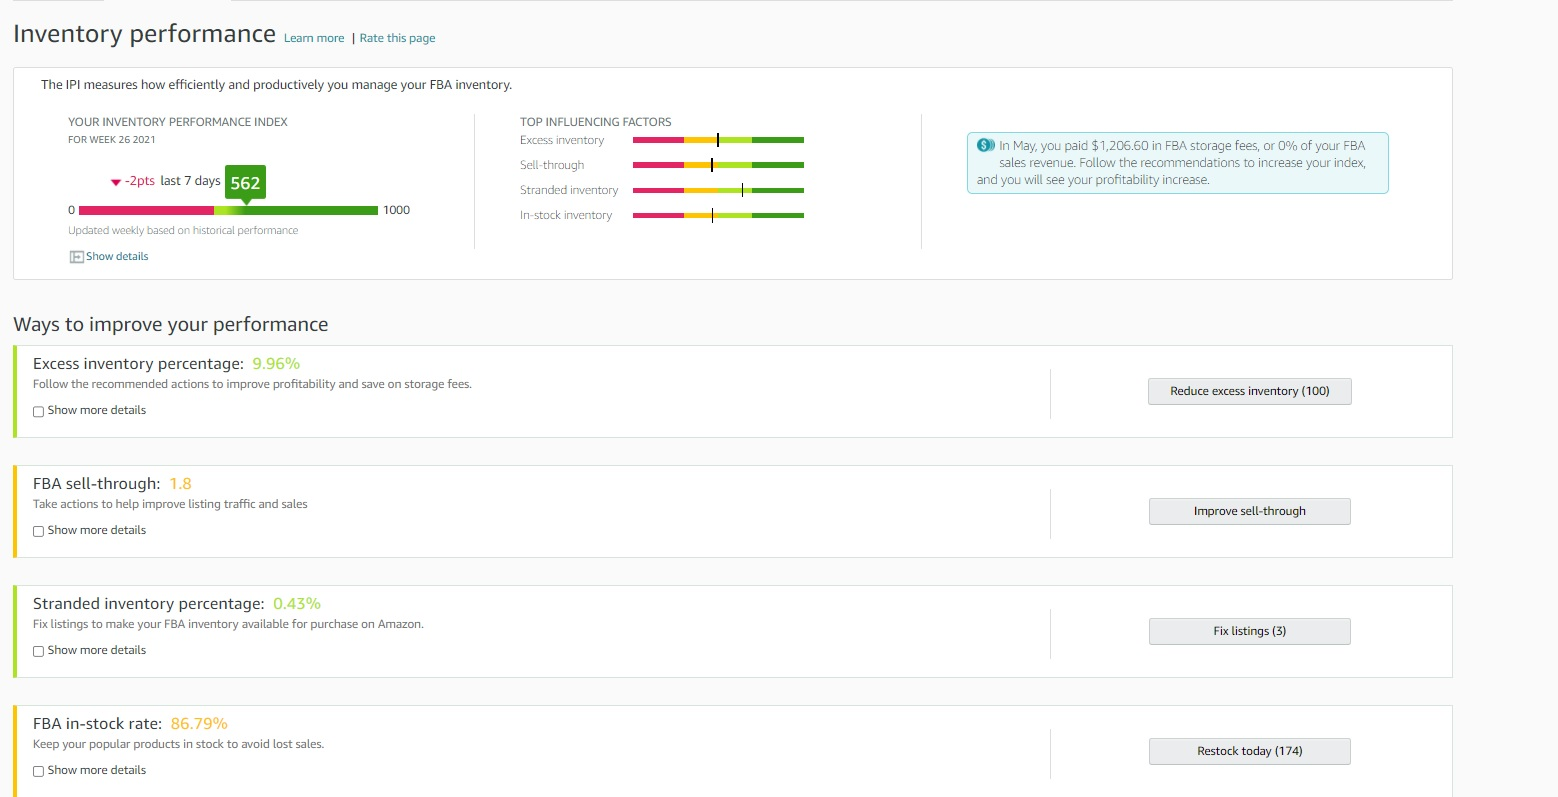

# Goal

Amazon IPI (Inventory Performance Index) Score is shaped by 4 other indicators. Excess Inventory %, FBA Sell Through Rate, Stranded Inventory%, FBA in Stock%.
We want to see if there is a weighted scale among those indicators, and which one has the significant effect on IPI Score.


# Method

* Stepwise Multiple Linear Regression
* IV: Excess Inventory %, FBA Sell Through Rate, Stranded Inventory%, FBA in Stock%
* DV: IPI

# Importing Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [3]:
M2=pd.read_excel("Modal-IPI.xlsx")

# Data Description

In [4]:
M2.head

<bound method NDFrame.head of        Date  Inventory performance index  Excess inventory percentage  \
0    week 8                          NaN                        21.28   
1    week 9                        514.0                        18.35   
2   week 10                        514.0                        20.00   
3   week 11                        519.0                        15.89   
4   week 12                        525.0                        16.49   
5   week 13                        531.0                        18.65   
6   week 14                        537.0                        19.57   
7   week 15                        548.0                        12.77   
8   week 16                        556.0                        10.18   
9   week 17                        560.0                        11.46   
10  week 18                        564.0                        10.57   
11  week 19                        566.0                         8.94   
12  week 20          

In [5]:
M2.describe()

,Inventory performance index,Excess inventory percentage,FBA sell-through,Stranded inventory percentage,FBA in-stock rate
count,14.000000,15.000000,14.000000,14.000000,13.000000
mean,545.428571,13.920667,1.638571,1.287857,91.718462
std,21.320681,4.865999,0.236020,1.168695,1.835233
min,514.000000,7.390000,1.250000,0.000000,88.840000
25%,526.500000,9.560000,1.447500,0.595000,89.950000
50%,552.000000,12.770000,1.720000,0.920000,92.140000
75%,565.500000,18.500000,1.797500,1.792500,93.490000
max,568.000000,21.280000,1.910000,3.890000,94.180000


In [6]:
M2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           15 non-null     object 
 1   Inventory performance index    14 non-null     float64
 2   Excess inventory percentage    15 non-null     float64
 3   FBA sell-through               14 non-null     float64
 4   Stranded inventory percentage  14 non-null     float64
 5   FBA in-stock rate              13 non-null     float64
dtypes: float64(5), object(1)
memory usage: 848.0+ bytes


### Data Wrangling

In [7]:
M2.columns

Index(['Date', 'Inventory performance index', 'Excess inventory percentage',
       'FBA sell-through', 'Stranded inventory percentage',
       'FBA in-stock rate'],
      dtype='object')

In [8]:
M2= M2[['Inventory performance index', 'Excess inventory percentage',
       'FBA sell-through', 'Stranded inventory percentage',
       'FBA in-stock rate']]

In [9]:
M2

,Inventory performance index,Excess inventory percentage,FBA sell-through,Stranded inventory percentage,FBA in-stock rate
0,NaN,21.28,NaN,NaN,NaN
1,514.0,18.35,1.25,1.14,NaN
2,514.0,20.00,1.33,3.89,89.92
3,519.0,15.89,1.27,1.95,92.22
4,525.0,16.49,1.41,2.41,93.49
5,531.0,18.65,1.56,3.18,92.96
6,537.0,19.57,1.79,1.04,93.63
7,548.0,12.77,1.70,1.32,94.18
8,556.0,10.18,1.64,0.61,93.55
9,560.0,11.46,1.74,0.14,92.14


In [10]:
M2=M2.dropna()

### Testing for Assumptions

* Linear relationship
* Homoscedasticity
* Homogenity of variance
* The x's are fixed and measured without error
* Multicollinearity
* Lack of outliers

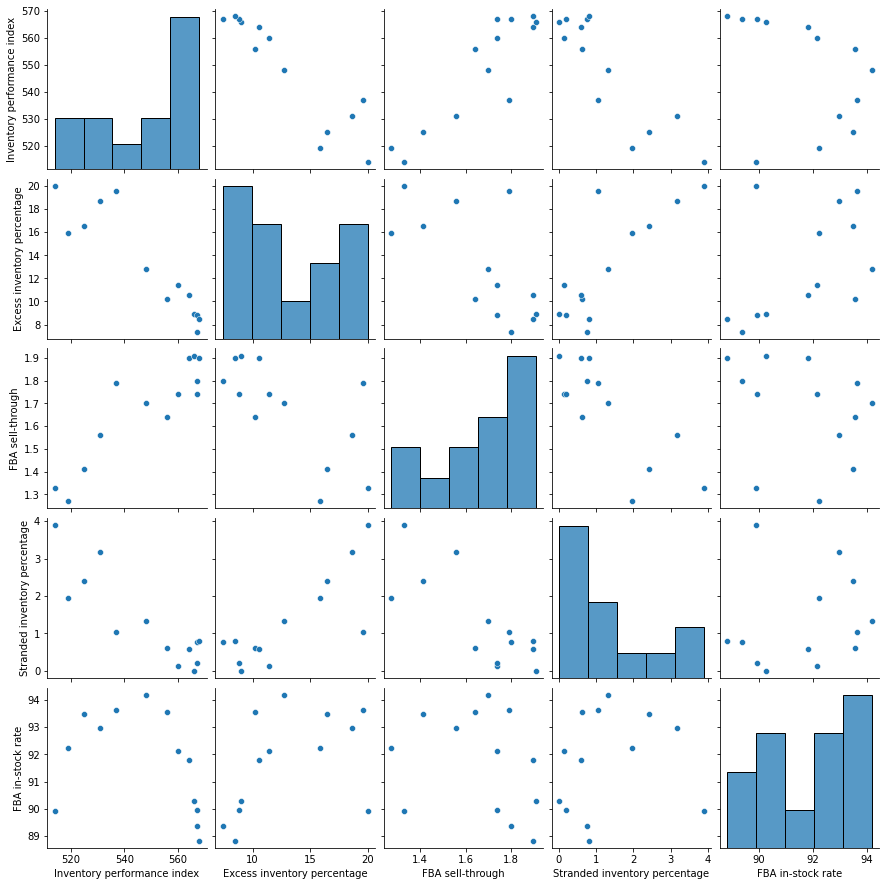

In [11]:
sns.pairplot(M2)

In [12]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [14]:
x = M2[['Excess inventory percentage','FBA sell-through', 'Stranded inventory percentage','FBA in-stock rate']]
y = M2['Inventory performance index']

In [15]:
model = sm.OLS(y,x).fit()

In [16]:
pred_val = model.fittedvalues.copy()
true_val = M2['Inventory performance index'].values.copy()
residual = true_val - pred_val

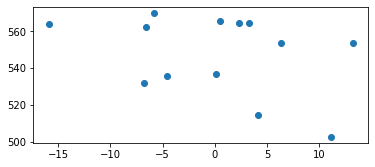

In [17]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [18]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=3.521595666276856, pvalue=0.006499134382822254)

In [19]:
M2.corr()


,Inventory performance index,Excess inventory percentage,FBA sell-through,Stranded inventory percentage,FBA in-stock rate
Inventory performance index,1.000000,-0.914357,0.894985,-0.876403,-0.399467
Excess inventory percentage,-0.914357,1.000000,-0.671290,0.807380,0.475451
FBA sell-through,0.894985,-0.671290,1.000000,-0.781021,-0.277875
Stranded inventory percentage,-0.876403,0.807380,-0.781021,1.000000,0.157845
FBA in-stock rate,-0.399467,0.475451,-0.277875,0.157845,1.000000


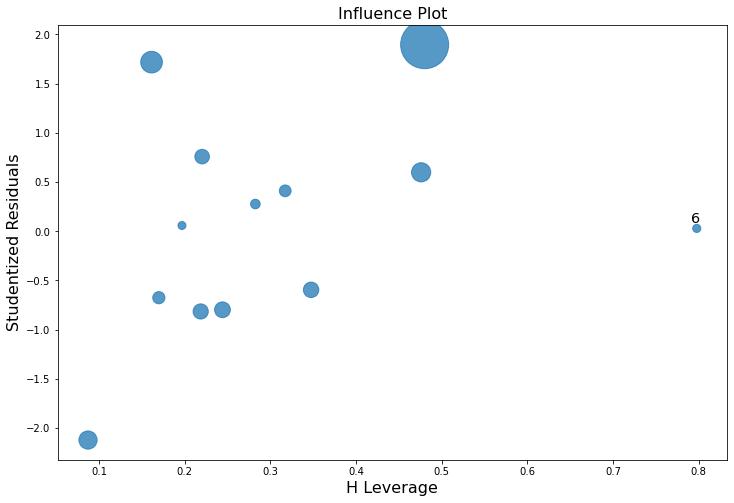

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, alpha = .05, ax = ax, criterion="cooks")

In [21]:
model.summary()

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Inventory performance index   R-squared (uncentered):                   1.000
Model:                                     OLS   Adj. R-squared (uncentered):              1.000
Method:                          Least Squares   F-statistic:                          1.140e+04
Date:                         Sun, 06 Jun 2021   Prob (F-statistic):                    1.17e-16
Time:                                 20:56:13   Log-Likelihood:                         -44.983
No. Observations:                           13   AIC:                                      97.97
Df Residuals:                                9   BIC:                                      100.2
Df Model:                                    4                                                  
Covariance Type:                     nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Excess inventory percentage      -4.2028      1.065     -3.944      0.003      -6.613      -1.792
FBA sell-through                 69.7989     18.452      3.783      0.004      28.057     111.541
Stranded inventory percentage     6.7372      4.246      1.587      0.147      -2.869      16.343
FBA in-stock rate                 5.2032      0.412     12.624      0.000       4.271       6.136
==============================================================================
Omnibus:                        0.186   Durbin-Watson:                   1.529
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.168
Skew:                          -0.186   Prob(JB):                        0.919
Kurtosis:                       2.585   Cond. No.                         670.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""